In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import KID_S21 as S21
import pandas as pd
import glob 

import matplotlibcolors
plt.style.use('matplotlibrc')

%matplotlib widget

In [2]:
dir = r'Z:\KIDonSun\experiments\Entropy ADR\LT361w2chip4trimmed_BF_20241105\S21\Power/'
df = S21.loop_over_S21_files(dir, kid=None, pread=110)
display(df)

c:\Users\wilbertr\ownCloud2\PhD\PhD\PythonProjects\spatial-mapping\NEW_S21_SCRIPT\KID_S21.py:43: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_results = pd.concat([df_results, new_entry], ignore_index=True)
c:\Users\wilbertr\ownCloud2\PhD\PhD\PythonProjects\spatial-mapping\NEW_S21_SCRIPT\KID_S21.py:43: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_results = pd.concat([df_results, new_entry], ignore_index=True)
c:\Users\wilbertr\ownCloud2\PhD\PhD\PythonProjects\spatial-mapping\NEW_S21_SCRIP

,KID,Power,Temperature,f0,f0_std,Ql,Ql_std,Qc,Qc_std,Qi,Qi_std,Pint,redchisqr
0,100,-110.0,0.099983,5.122131,9.137174e-08,33891.072523,38.523466,36858.713982,55.823698,420934.053446,7191.057618,-70.035194,0.000011
1,101,-110.0,0.099995,5.131334,9.213616e-08,55579.916862,106.100054,62395.458048,140.645764,508827.439606,9513.798513,-68.024671,0.000018
2,102,-110.0,0.099971,5.144063,1.061256e-07,37890.965056,56.562402,41026.306937,91.531620,495807.609304,13246.006536,-69.531410,0.000020
3,103,-110.0,0.100009,5.154332,8.579166e-08,52584.899361,87.923858,58877.739099,117.018193,492000.450343,8284.609943,-68.253789,0.000015
4,104,-110.0,0.100003,5.167725,9.535068e-08,37556.376573,49.346875,35293.699117,94.338698,-585811.933218,19888.390791,-68.954797,0.000016
...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,96,-110.0,0.100006,5.091319,9.169782e-08,52095.159367,93.769807,58979.056920,125.791628,446334.848217,7338.839086,-68.342530,0.000018
389,97,-110.0,0.099956,5.099485,8.394587e-08,45322.921322,64.008253,49547.014495,90.278315,531620.716728,10387.514082,-68.795316,0.000012
390,98,-110.0,0.099977,5.107331,9.177718e-08,48820.229207,81.459937,54423.153981,109.162949,474207.839437,8369.406991,-68.557340,0.000016
391,99,-110.0,0.100073,5.111930,9.008675e-08,46788.010891,73.192087,50864.183908,106.577485,583840.278870,14021.781848,-68.632928,0.000015


In [3]:
def fit(x, a, b):
    return a*x**(-2)+b 

93
1012375.6037777208 16735.575872398127


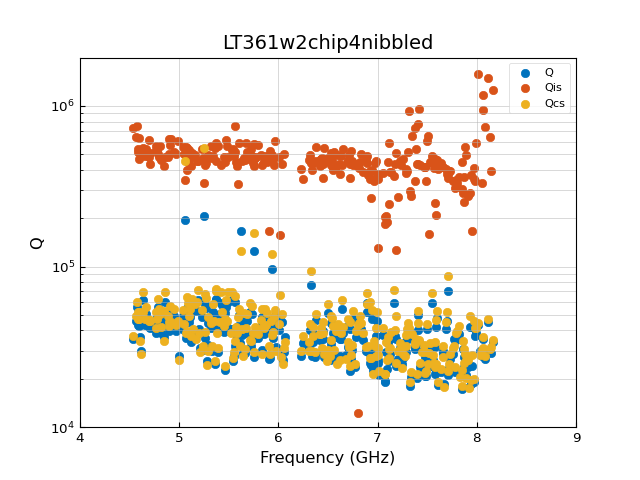

In [7]:
f0s = np.array(df['f0'])
Qs = np.array(df['Ql'])
Qis = np.array(df['Qi'])
Qcs = np.array(df['Qc'])

min_df = 0.002
df0s = f0s[1:] - f0s[:-1]
df_mask = np.zeros(f0s.shape, dtype=bool)
too_close = df0s < min_df
too_close_mask = np.hstack((False, too_close)) + np.hstack((too_close, False))
print(np.sum(too_close_mask))
popt, pcov = curve_fit(fit, f0s[~too_close_mask], Qcs[~too_close_mask])
f0s_fit = np.linspace(f0s[~too_close_mask].min(), f0s[~too_close_mask].max(), 100)

fig, ax = plt.subplots()
ax.set_title('LT361w2chip4nibbled')
ax.set_yscale('log')
ax.scatter(f0s[~too_close_mask], Qs[~too_close_mask], label='Q')
ax.scatter(f0s[~too_close_mask], Qis[~too_close_mask], label='Qis')
ax.scatter(f0s[~too_close_mask], Qcs[~too_close_mask], label='Qcs')
# ax.plot(f0s_fit, fit(f0s_fit, *popt), label='fit $y=a/x^2 +b$', c='k', ls='--')
ax.set_xlim(4,9)
ax.set_xlabel('Frequency (GHz)')    
ax.set_ylim(1e4,2e6)
ax.set_ylabel('Q')
ax.legend()
print(*popt)

Text(0, 0.5, 'Length coupler (um)')

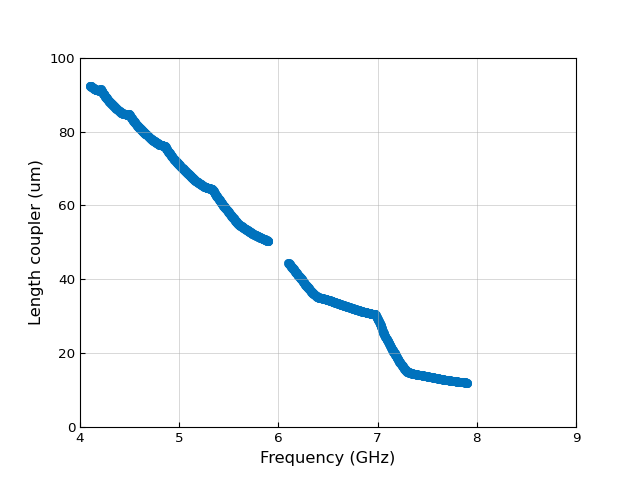

In [56]:
couplers = np.load(r'C:\Users\wilbertr\ownCloud2\PhD\PhD\PythonProjects\spatial-mapping\Mappings\LT361w2chip9\LT361_4-8GHz_1024px_couplers.npy')
f0s_design = np.load(r'C:\Users\wilbertr\ownCloud2\PhD\PhD\PythonProjects\spatial-mapping\Mappings\LT361w2chip9\LT361_4-8GHz_1024px_F0s.npy')*1e-9
fig, ax = plt.subplots()
ax.scatter(f0s_design, couplers)
ax.set_xlim(4,9)
ax.set_xlabel('Frequency (GHz)')    
ax.set_ylim(0, 100)
ax.set_ylabel('Length coupler (um)')